In [1]:
import os
import time
import pandas as pd
import numpy as np
import collections
import seaborn as sns
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

os.getcwd()

'C:\\Users\\Theodore\\Desktop\\share\\Wits Docs\\Standard\\Case Study'

## Read-in data

In [2]:
# Read Dataset
df = pd.read_csv('bank-additional.csv', sep=';')
df = df[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week','y']]
print(df.shape)

# Label encode naively
columns_to_encode  = ['job','marital','education','contact','day_of_week','month','default','housing','loan','y']
le = preprocessing.LabelEncoder()
for column in columns_to_encode:
        df[column] = le.fit_transform(df[column])
          
# Create Training and Testing Data
X = df[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week']]
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(collections.Counter(y_train),collections.Counter(y_test))

# View data
df.iloc[:10,:]

(4119, 11)
Counter({0: 2563, 1: 320}) Counter({0: 1105, 1: 131})


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,y
0,30,1,1,2,0,2,0,0,6,0,0
1,39,7,2,3,0,0,0,1,6,0,0
2,25,7,1,3,0,2,0,1,4,4,0
3,38,7,1,2,0,1,1,1,4,0,0
4,47,0,1,6,0,2,0,0,7,1,0
5,32,7,2,6,0,0,0,0,9,2,0
6,32,0,2,6,0,2,0,0,9,1,0
7,41,2,1,6,1,2,0,0,7,1,0
8,31,7,0,5,0,0,0,0,7,3,0
9,35,1,1,2,1,0,0,1,6,2,0


## Check for null values and duplicate records

In [3]:
# df.drop_duplicates(inplace=True)
# print(df.shape)
ddf = pd.isna(df.values)
pd.DataFrame(ddf, columns=['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
                           'contact', 'month', 'day_of_week','y'])

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,y
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
4114,False,False,False,False,False,False,False,False,False,False,False
4115,False,False,False,False,False,False,False,False,False,False,False
4116,False,False,False,False,False,False,False,False,False,False,False
4117,False,False,False,False,False,False,False,False,False,False,False


## Note:
The data set contains about 107 duplicate records. This could very well be different customers who coincidentally have exactly the same attributes/profile. The question is how will removing them affect the model? Keeping them is likely to assign a higher weight to clients with a similar profile but is that prudent?

In [4]:
pd.concat([df.describe(include='all'), df.dtypes.to_frame().T])

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,y
count,4119,4119,4119,4119,4119,4119,4119,4119,4119,4119,4119
mean,40.1136,3.82496,1.17698,3.78029,0.195436,1.08157,0.348386,0.356154,4.29497,2.00971,0.109493
std,10.3134,3.60632,0.606341,2.14959,0.397196,0.983915,0.741647,0.47892,2.30519,1.38923,0.312294
min,18,0,0,0,0,0,0,0,0,0,0
25%,32,1,1,2,0,0,0,0,3,1,0
50%,38,3,1,3,0,2,0,0,4,2,0
75%,47,7,2,6,0,2,0,1,6,3,0
max,88,11,3,7,2,2,2,1,9,4,1
0,int64,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32


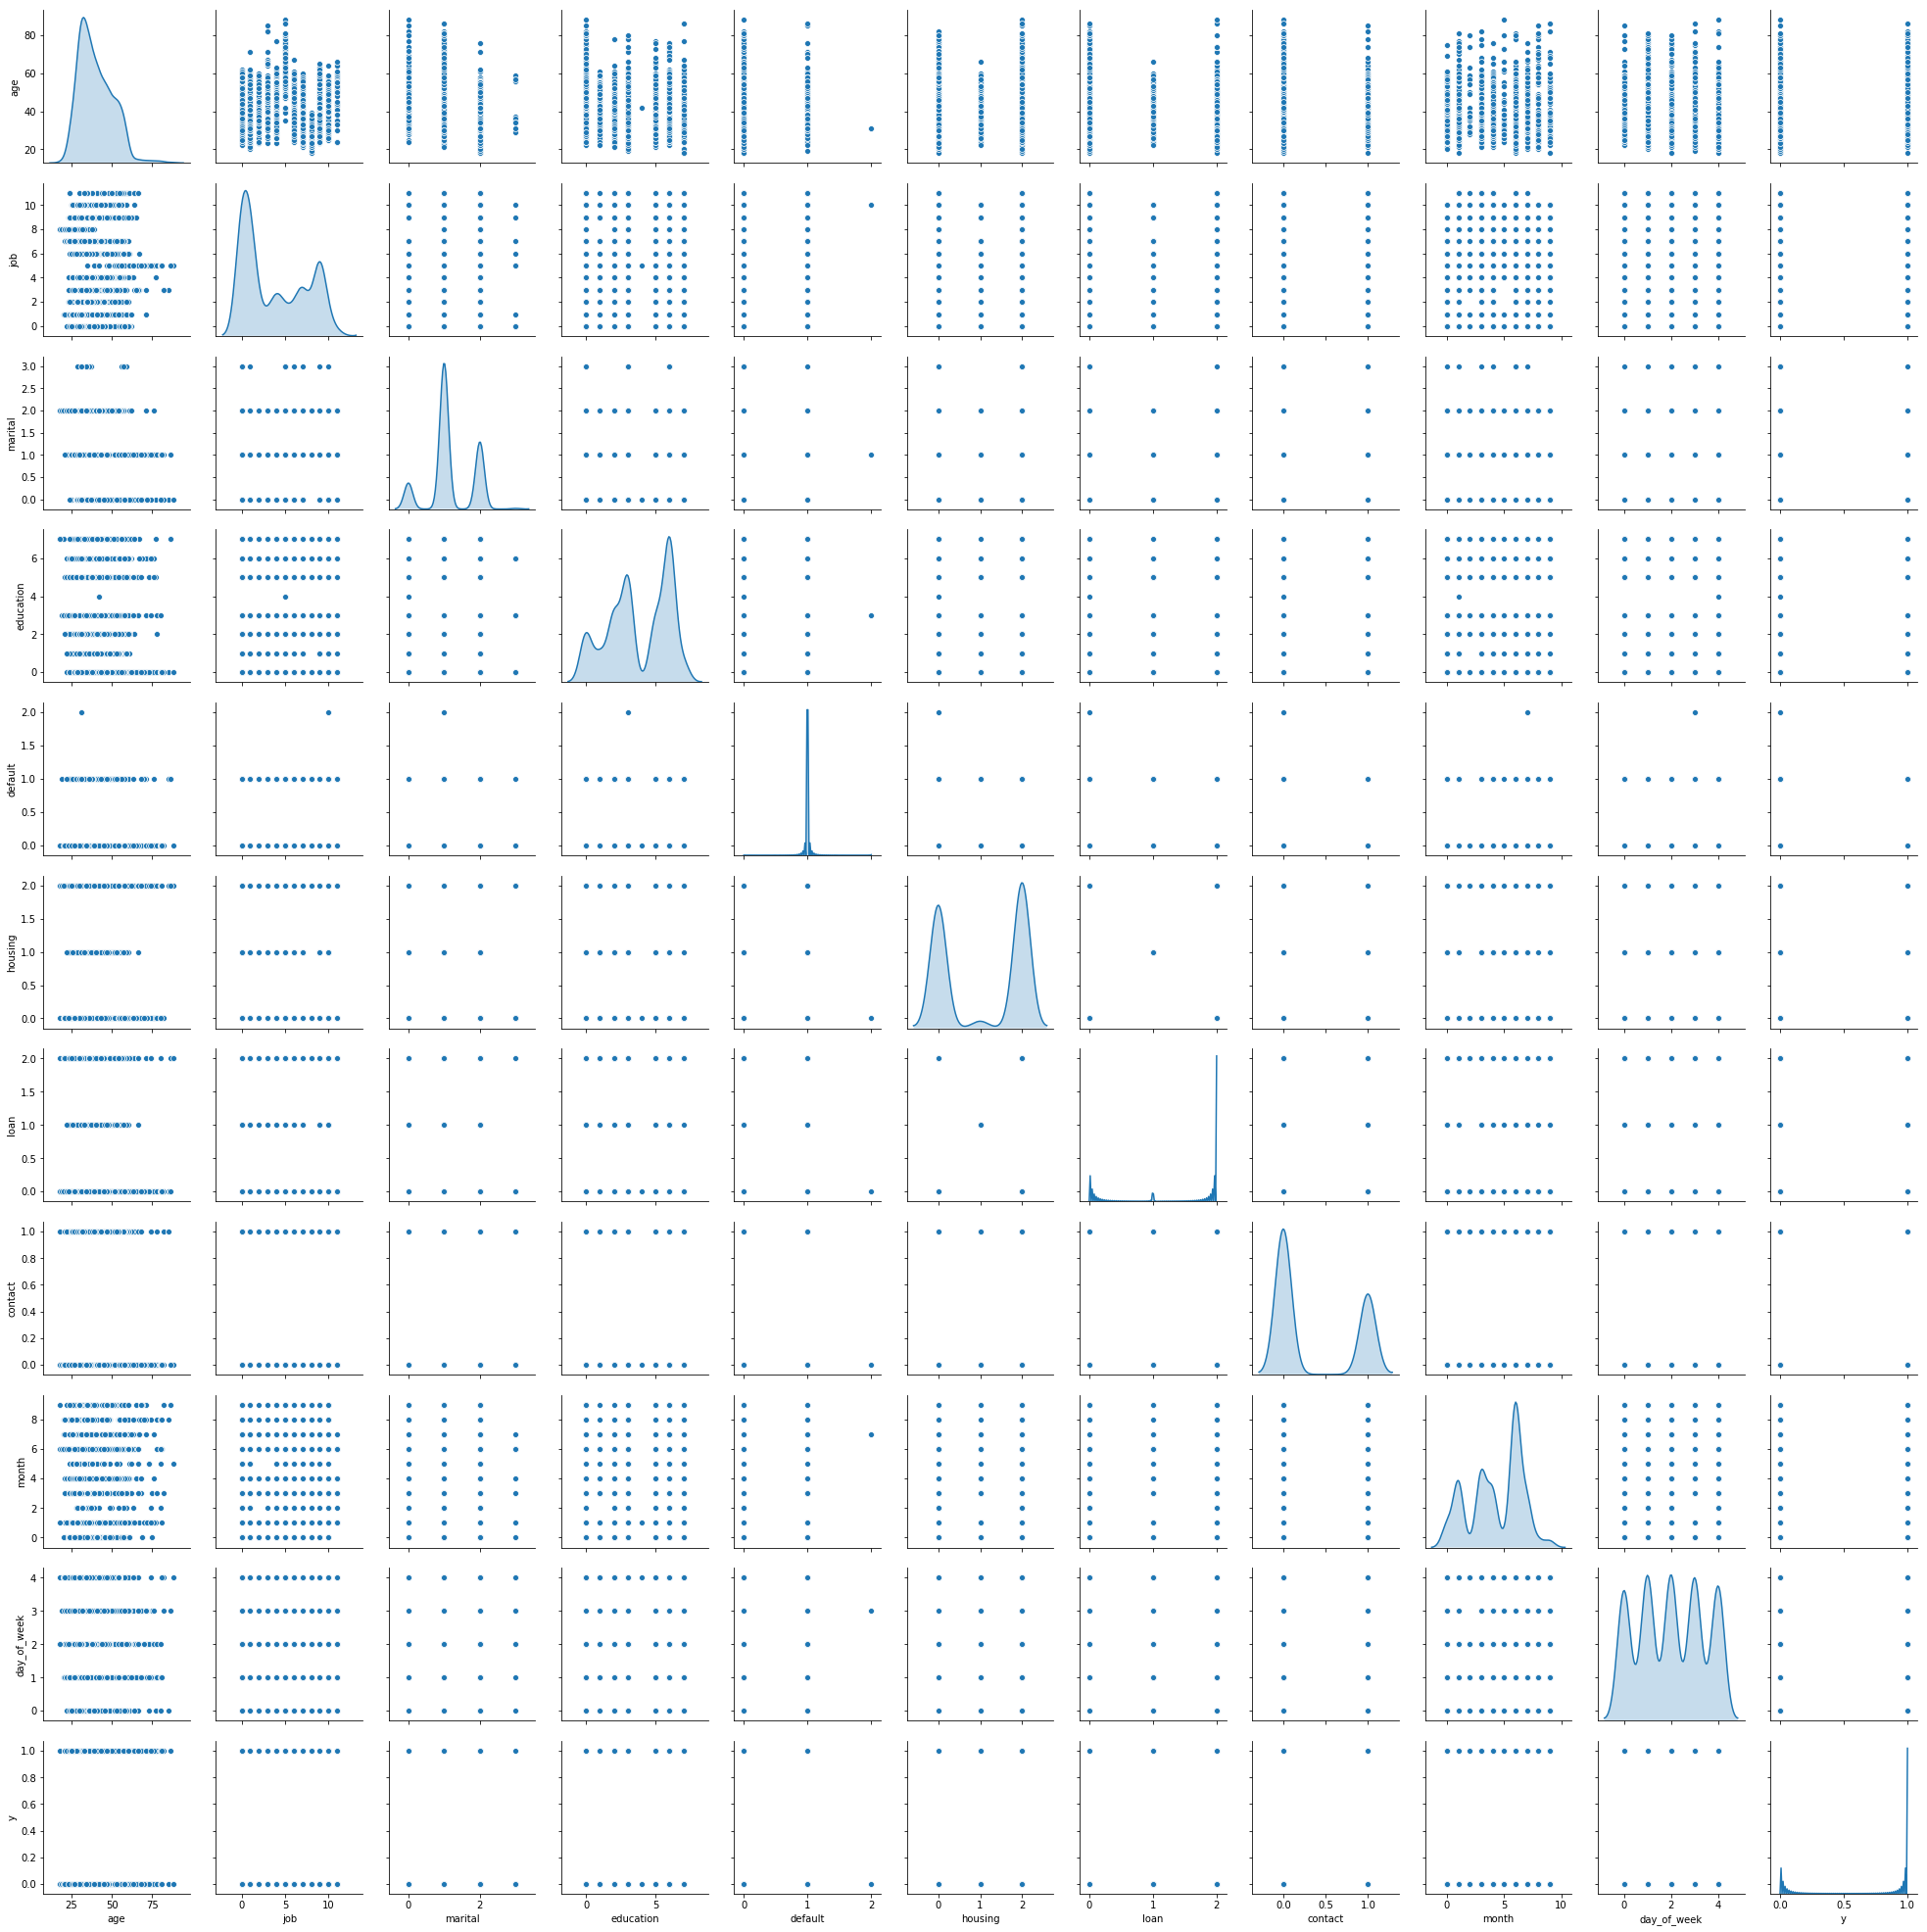

In [5]:
sns.pairplot(df,kind='scatter',diag_kind='kde')

## Correlation Matrix

In [6]:
def Correlation_Matrix(X):
    
    corrB = X.corr()
    cmap = cmap =sns.diverging_palette(250, 15, s=75, l=40, as_cmap=True, center='dark')
    #sns.palplot(sns.color_palette("bright", 10))
    def magnify():
        return [dict(selector="th",
                     props=[("font-size", "7pt")]),
                dict(selector="td",
                     props=[('padding', "0em 0em")]),
                dict(selector="th:hover",
                     props=[("font-size", "12pt")]),
                dict(selector="tr:hover td:hover",
                     props=[('max-width', '200px'),
                            ('font-size', '12pt')])]

    corrmatrix = corrB.style.background_gradient(cmap, axis=1)\
        .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
        .set_caption("Hover to magify")\
        .set_precision(2)\
        .set_table_styles(magnify())
    return corrmatrix

corrmatrix = Correlation_Matrix(df)

In [7]:
corrmatrix

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,y
age,1,0.015,-0.39,-0.13,0.16,-0.0073,-0.0086,0.013,-0.021,-0.029,0.06
job,0.015,1,0.014,0.13,-0.04,0.0027,-0.0008,-0.012,-0.017,-0.0041,0.027
marital,-0.39,0.014,1,0.1,-0.082,0.0027,-0.0059,-0.067,-0.034,0.0072,0.044
education,-0.13,0.13,0.1,1,-0.2,0.03,-0.021,-0.12,-0.081,-0.042,0.067
default,0.16,-0.04,-0.082,-0.2,1,-0.012,0.0079,0.15,-0.0086,-0.015,-0.077
housing,-0.0073,0.0027,0.0027,0.03,-0.012,1,0.064,-0.073,-0.04,0.012,0.00096
loan,-0.0086,-0.0008,-0.0059,-0.021,0.0079,0.064,1,0.004,-0.024,0.0026,-0.013
contact,0.013,-0.012,-0.067,-0.12,0.15,-0.073,0.004,1,0.26,-0.0096,-0.14
month,-0.021,-0.017,-0.034,-0.081,-0.0086,-0.04,-0.024,0.26,1,0.034,0.005
day_of_week,-0.029,-0.0041,0.0072,-0.042,-0.015,0.012,0.0026,-0.0096,0.034,1,-0.0064


In [8]:
from sklearn.feature_selection import mutual_info_classif
import scipy.stats as ss

df_ = pd.DataFrame(df.corr(method='pearson').y)
df_.drop(df_.index[10], inplace=True)

mutual = pd.DataFrame(mutual_info_classif(X, y, discrete_features='auto', n_neighbors=3, copy=True, random_state=None))
mutual.index = df_.index

df_['Mutual Information Criteria']=mutual_info_classif(X, y, discrete_features='auto', n_neighbors=3, copy=True, random_state=None)
df_. rename(columns={'y': 'Pearson Correlation Coefficient'}, inplace=True)
df_

,Pearson Correlation Coefficient,Mutual Information Criteria
age,0.060374,0.000000
job,0.026725,0.012936
marital,0.043833,0.000000
education,0.067316,0.006821
default,-0.076627,0.002992
housing,0.000957,0.008555
loan,-0.012709,0.000000
contact,-0.137401,0.011732
month,0.005049,0.018341
day_of_week,-0.006370,0.000000


## Feature Selection

In [9]:
from sklearn.neural_network import MLPClassifier

features = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week']
for i in features:
    ann = MLPClassifier(solver='lbfgs', activation='relu', learning_rate='constant', learning_rate_init=0.001,
                   hidden_layer_sizes=(128, 3), early_stopping=False, alpha=1e-5, batch_size='auto', 
                   validation_fraction=0.1, verbose=False, random_state=1).fit(X_train[[i]], y_train)  
    print(i,ann.score(X_test[[i]],y_test))

age 0.894012944984
job 0.894012944984
marital 0.894012944984
education 0.894012944984
default 0.894012944984
housing 0.894012944984
loan 0.894012944984
contact 0.894012944984
month 0.894012944984
day_of_week 0.894012944984


Notes_Feature Selection:
1. The "month" feature gives the highest accuracy and "age" the least. 

## Normalise Age attribute

In [10]:
#Select numerical columns which need to be normalized
train_norm = X_train[X_train.columns[0:10]]
test_norm = X_test[X_test.columns[0:10]]

# Normalise training data
std_scale1 = preprocessing.StandardScaler().fit(train_norm)
x_train_norm = std_scale1.transform(train_norm)
training_norm_col = pd.DataFrame(x_train_norm, index=train_norm.index, columns=train_norm.columns)
X_train.update(training_norm_col)

# Normalise testing data
x_test_norm = std_scale1.transform(test_norm)
testing_norm_col = pd.DataFrame(x_test_norm, index=test_norm.index, columns=test_norm.columns)
X_test.update(testing_norm_col) # Update test data with normalised columns

C:\Users\Theodore\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:5804: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = expressions.where(mask, this, that)
C:\Users\Theodore\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:5804: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = expressions.where(mask, this, that)


## Hyperparameter Tuning

In [47]:
# from sklearn.neural_network import MLPClassifier
# from sklearn.datasets import make_gaussian_quantiles
# from sklearn.model_selection import GridSearchCV

# # Create and fit an AdaBoosted decision tree
# lr_list = [0.5, 0.65, 0.75, 0.85, 0.95,1] #0.5, 0.65, 0.75, 0.85, 0.95,0.01,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,


# for learning_rate in lr_list:
#     for n_est in est_list:
#         nn = MLPClassifier(solver='lbfgs', activation='relu', learning_rate='constant', hidden_layer_sizes=(5, 2), 
#                    early_stopping=False,alpha=1e-5, batch_size='auto', validation_fraction=0.1, verbose=False, 
#                    random_state=1,early_stopping=False)
#         %time nn.fit(X_train, y_train) 
    
#         print("Learning rate, Estimators: ",learning_rate , n_est)
#         print("Accuracy score (training): {0:.3f}".format(abdt.score(X_train, y_train)))
#         print("Accuracy score (validation): {0:.3f}".format(abdt.score(X_test, y_test)))
#         print("\n")

Wall time: 420 ms
Learning rate, Estimators:  0.5 100
Accuracy score (training): 0.897
Accuracy score (validation): 0.892


Wall time: 822 ms
Learning rate, Estimators:  0.5 200
Accuracy score (training): 0.899
Accuracy score (validation): 0.891


Wall time: 1.18 s
Learning rate, Estimators:  0.5 300
Accuracy score (training): 0.902
Accuracy score (validation): 0.893


Wall time: 1.33 s
Learning rate, Estimators:  0.5 400
Accuracy score (training): 0.902
Accuracy score (validation): 0.893


Wall time: 1.67 s
Learning rate, Estimators:  0.5 500
Accuracy score (training): 0.903
Accuracy score (validation): 0.892


Wall time: 1.51 s
Learning rate, Estimators:  0.5 600
Accuracy score (training): 0.903
Accuracy score (validation): 0.892


Wall time: 2.26 s
Learning rate, Estimators:  0.5 700
Accuracy score (training): 0.903
Accuracy score (validation): 0.893


Wall time: 2.94 s
Learning rate, Estimators:  0.5 800
Accuracy score (training): 0.903
Accuracy score (validation): 0.894


Wall tim

## Hyperparameter Tuning via GridSearch

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

# Perform GridSearch ,'adam'
parameters = {'solver': ['adam'], 'max_iter': [500,1000,1500], 'alpha': 10.0 ** -np.arange(1, 7),
              'hidden_layer_sizes':np.arange(5, 12), 'random_state':[0,1,2,3,4,5,6,7,8,9],
              'learning_rate':np.arange(0.001,1,0.005)}
clf_grid = GridSearchCV(MLPClassifier(),parameters, cv=3, n_jobs=-1)
%time clf_grid.fit(X_train,y_train)
bestscore = clf_grid.best_score_
bestparam = clf_grid.best_params_

print("Best score: %0.3f" %bestscore)
print("Using the following parameters:")
print(clf_grid.best_params_)

Wall time: 1h 9min 21s
Best score: 0.892
Using the following parameters:
{'alpha': 0.10000000000000001, 'hidden_layer_sizes': 8, 'max_iter': 500, 'random_state': 6, 'solver': 'adam'}


## Train Model with Optimal Parameters

In [19]:
# Train NN Classifer
nn = MLPClassifier(solver='adam', activation='relu', learning_rate='constant', learning_rate_init=0.001,
                   hidden_layer_sizes=(128, 8), early_stopping=False, alpha=1e-4, batch_size='auto', 
                   validation_fraction=0.1, max_iter=500, verbose=False, random_state=6)
%time nn.fit(X_train, y_train)

# Make Predictions
train_pred = nn.predict(X_train)
test_pred = nn.predict(X_test)
pred_prob = nn.predict_proba(X_test)
ytest = y_test.astype(np.float64)
predictions = test_pred.astype(np.float64)
ytest = ytest.values
train_accuracy = np.sum(train_pred==y_train)/y_train.shape[0] * 100
test_accuracy = np.sum(test_pred==y_test)/y_test.shape[0] * 100
print("Training Accuracy: %.3f%%" % (train_accuracy))
print("Testing Accuracy: %.3f%%" % (test_accuracy))

tn, fp, fn, tp = confusion_matrix(y_test, test_pred).ravel()
print('tn:',tn, 'fp:',fp, 'fn:',fn, 'tp:',tp)

Wall time: 23.3 s
Training Accuracy: 97.017%
Testing Accuracy: 85.032%
tn: 1038 fp: 67 fn: 118 tp: 13


C:\Users\Theodore\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


## ROC

<Figure size 144x144 with 0 Axes>

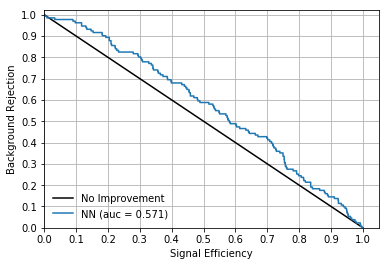

In [20]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

fpr, tpr, thresholds = roc_curve(y_test, pred_prob[:,1])
auc = auc(fpr,tpr)

plt.figure(figsize=(2,2))
plt.figure(facecolor="white")
plt.plot([0, 1], [1, 0], 'k-',label='No Improvement')
plt.plot(1-fpr, tpr, label='NN (auc = %0.3f)'%auc)
plt.ylabel('Background Rejection')
plt.xlabel('Signal Efficiency')
plt.xlim([0.0,1.05])
plt.ylim([0.0,1.02])
plt.xticks(np.arange(0,1.05,0.1))
plt.yticks(np.arange(0,1.05,0.1))
plt.legend(frameon=False,loc=3)
plt.grid()
plt.show()

## Confusion Matrix

In [22]:
import itertools
from sklearn.metrics import confusion_matrix

start = time.time()

prediction_classes = []
for i in range(len(pred_prob)):
    r = round(pred_prob[i])
    prediction_classes.append(r)
    
end = time.time()  
prediction_classes = np.asarray(prediction_classes)
print("--- %s seconds ---" %(end - start))

print(__doc__)

class_names = ["Sale unsuccessful", "Sale successful"] #Sale unsuccessful Sale successful

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Compute confusion matrix
cnf_matrix = confusion_matrix(ytest,prediction_classes)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(8,6))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix')

# Plot normalized confusion matrix
plt.figure(figsize=(8,6))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.show()

TypeError: type numpy.ndarray doesn't define __round__ method